**Bag of Words**

Building a classification model using bag of words feature

In [1]:
#importing libraries
import pandas as pd                                         #data processing
import re                                                   #regular expression for data cleaning
from sklearn.feature_extraction.text import CountVectorizer #feature extraction
import nltk                                                 #natural language toolkit
from sklearn.linear_model import LogisticRegression  
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import warnings
from nltk.corpus import stopwords                           #stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() 
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
data = pd.read_csv('tweets.csv')
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [3]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
#dropping column id
data.drop(['id'], axis = 1, inplace = True)

Taking a look at the proportion of classes

In [5]:
data.label.value_counts(normalize = True)

0    0.744192
1    0.255808
Name: label, dtype: float64

The problem is that of imbalanced class problem

**Text Preprocessing**

1. Contraction mapping -> expanding the shortened versions or contraction of words using contraction dictionary
2. Removing User mentions -> eg. @JD_Lin
3. Removing hashtag symbols -> #
4. Removing links
5. Removing special charachters, punctuation marks and numbers

In [6]:
# making a dictionary of contractions
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [7]:
def clean_text(x):
  x = ' '.join([ contraction_mapping[key] if key in contraction_mapping else key for key in x.split(" ")]) #contraction_mapping
  x = re.sub("@\w+", " ", x) #removing mentions
  x = re.sub("#", " ", x) #removing hashtags
  x = re.sub(" https\S+", " ", x) #removing links
  x = re.sub("[^a-zA-Z]", " ", x) #removing special characters punctuation marks
  x = re.sub("'s\b", " ", x) #reomving 's 
  x = x.lower() #converting everything to lower_case
  tokens = [w for w in x.split() if not w in stop_words] #stopwords removal
  final = ""
  for i in tokens:
    final = final + lemmatizer.lemmatize(i) + " "
  return final.strip()

In [8]:
data.tweet = data.tweet.apply( lambda x: clean_text(x) )
data.tweet[0]

'fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone'

**Exploring Data**

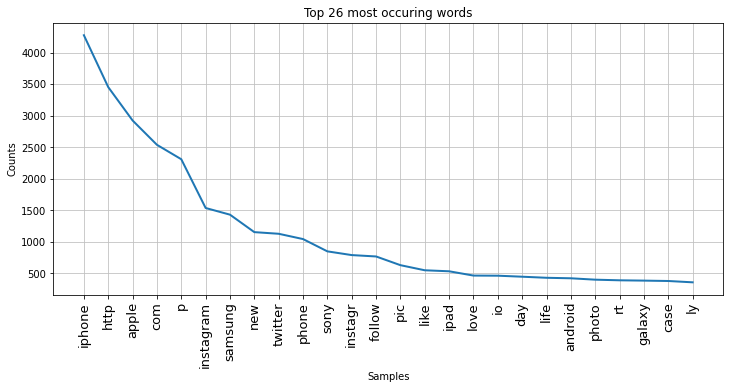

In [9]:
all_words = []
for line in data.tweet:
  words = line.split(' ')
  for word in words:
    all_words.append(word)

plt.figure(figsize=(12,5))
plt.xticks( fontsize = 13, rotation = 90 )
plt.title('Top 26 most occuring words') 
fd = nltk.FreqDist(all_words)
fd.plot(26, cumulative = False)


**Model Building**

Bag of Words: 
Here frequency of every words is calculated to create a feature space

In [10]:
vectorize = CountVectorizer()
feature = vectorize.fit_transform(data.tweet) #creating feature space
feature.shape

(7920, 19542)

In [11]:
vectorize.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['aa',
 'aaaahhhhhhh',
 'aag',
 'aagrlngjti',
 'aah',
 'aalborg',
 'aand',
 'aapl',
 'aarhus',
 'aaron',
 'aarp',
 'aarrrggghhhh',
 'aashamsakal',
 'aauicnsn',
 'aaumhs',
 'aaydojbfkq',
 'aayp',
 'ab',
 'abah',
 'abareta',
 'abay',
 'abb',
 'abc',
 'abdysg',
 'abe',
 'aber',
 'abercrombie',
 'abi',
 'ability',
 'abit',
 'abkwryzixi',
 'able',
 'ableton',
 'abnqum',
 'abo',
 'aboard',
 'aboutalook',
 'aboutdamntime',
 'abouttime',
 'abouttonight',
 'abozsj',
 'abp',
 'abscbn',
 'absence',
 'absolute',
 'absolutely',
 'absurd',
 'abt',
 'abu',
 'abudhabi',
 'abuja',
 'abujacity',
 'abujafct',
 'abujapeople',
 'abujaphones',
 'abukamalyasinpic',
 'abuse',
 'abxq',
 'ac',
 'academia',
 'academic',
 'academy',
 'acap',
 'acc',
 'accelerate',
 'accept',
 'acceptable',
 'accepted',
 'accepts',
 'accesories',
 'accesorios',
 'access',
 'accessed',
 'accessible',
 'accessoires',
 'accessori',
 'accessoriespic',
 'accessory',
 'accessorypic',
 'accgq',
 'accident',
 'accidental',
 'accidentally'

In [12]:
#Splitting the data into train and test set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(feature, data.label, test_size = 0.3, random_state = 42)

Train Logistic Regression

In [13]:
lr = LogisticRegression()
lr.fit(xtrain_bow, ytrain)

y_pred = lr.predict(xvalid_bow)

f1_score(yvalid, y_pred) 

0.78064012490242